In [0]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
telcom = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# New Section

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [137]:
#checking for null data
telcom.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [138]:
telcom.info()
#we can see that "TotalCharges" is supposed to be numerical but info shows it as object--> more inspection is needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [139]:
telcom['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [140]:
#we can spot empty space in the column
telcom["TotalCharges"].min()

' '

In [141]:
# 11 rows contains empty values
telcom[telcom["TotalCharges"]==" "]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [0]:
#removing data that contain empty values
telcom=telcom[telcom["TotalCharges"]!=" "]

In [0]:
telcom["TotalCharges"] =telcom["TotalCharges"].astype(float)

In [0]:
n_customers=telcom.shape[0]

In [145]:
#count of churn and not_churn
status=pd.DataFrame(telcom["Churn"].value_counts()).T
status

,No,Yes
Churn,5163,1869


In [146]:
(status['No']/n_customers)*100

Churn    73.421502
Name: No, dtype: float64

In [147]:
(status['Yes']/n_customers)*100

Churn    26.578498
Name: Yes, dtype: float64

In [0]:
#we can see that 26.5% of the base did churn

In [0]:
churn_data=telcom[telcom['Churn']=='Yes']

In [0]:
no_churn_data=telcom[telcom['Churn']=='No']

In [0]:
def pie_plot(data1,data2,tit1,tit2):
  import matplotlib.pyplot as plt
  data1=data1.select_dtypes(object)
  data2=data2.select_dtypes(object)
  lenghth=len(data1.select_dtypes(object).columns)
  col1=data1.select_dtypes(object).columns
  col2=data2.select_dtypes(object).columns
  for i in range(lenghth):
    fig, ax = plt.subplots(nrows=1,ncols=2)
    lab1=data1.iloc[:,i].unique().tolist()
    lab2=data2.iloc[:,i].unique().tolist()
    ax[0].pie(data1[col1[i]].value_counts().values.tolist(),labels=lab1)
    ax[1].pie(data2[col2[i]].value_counts().values.tolist(),labels=lab2)
    ax[0].set_title(tit1+" "+col1[i])
    ax[1].set_title(tit2+" "+col2[i])


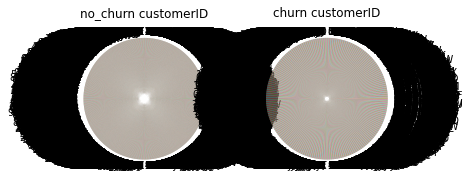

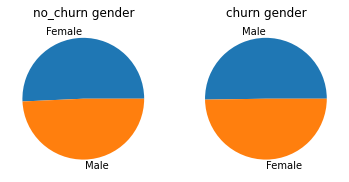

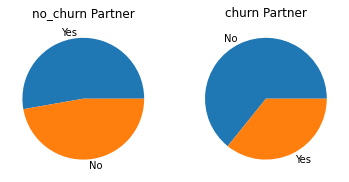

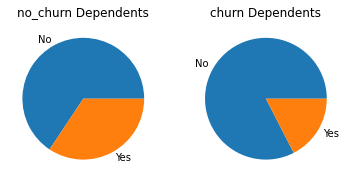

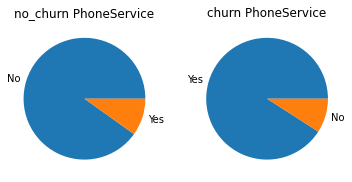

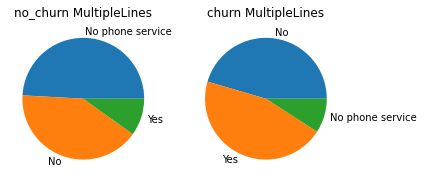

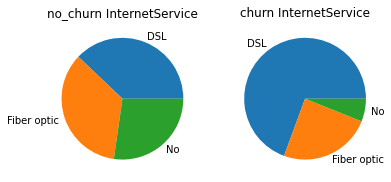

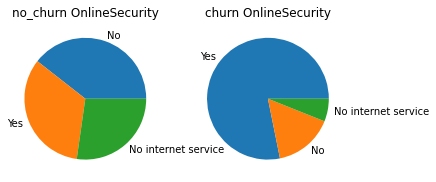

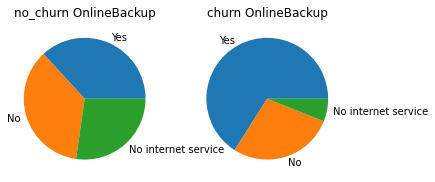

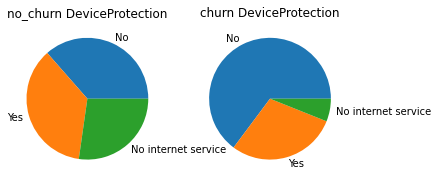

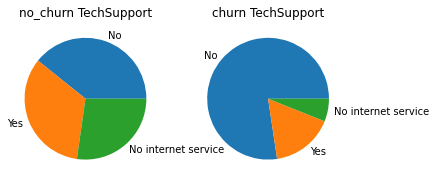

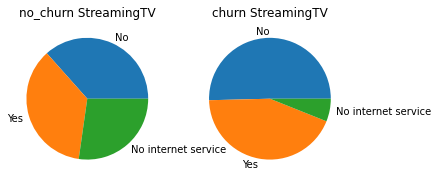

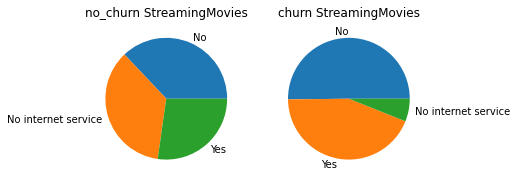

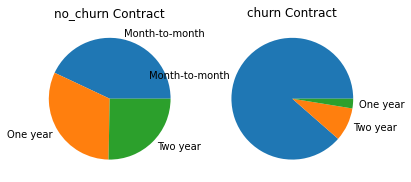

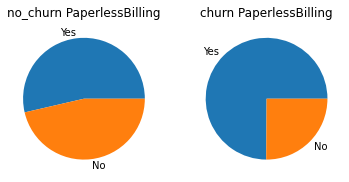

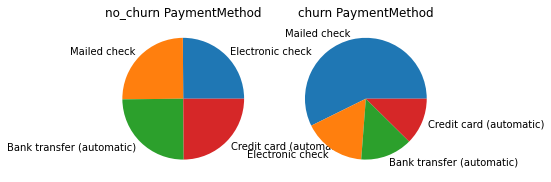

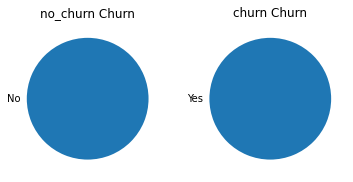

In [152]:
pie_plot(no_churn_data,churn_data,'no_churn','churn')

In [0]:
import matplotlib.pyplot as plt
def hist2(data1,data2,title1,title2):
  length=len(data1.select_dtypes(include=['int64','float64']).columns)
  col=data1.select_dtypes(include=['int64','float64']).columns
  for i in range(length):
    fig, ax = plt.subplots()
    plt.hist(data1[col[i]],label=title1)
    plt.hist(data2[col[i]],label=title2)
    ax.legend()
    ax.set_title(col[i])
    fig.tight_layout()

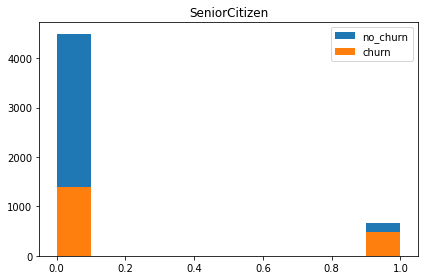

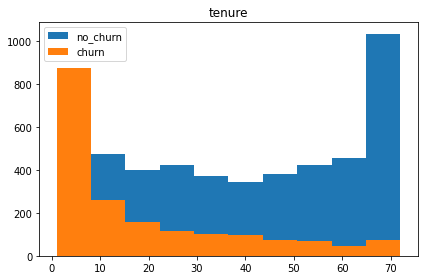

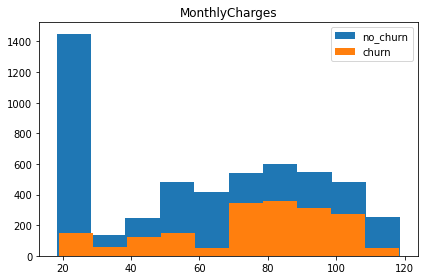

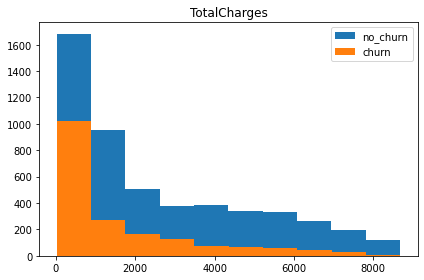

In [154]:
hist2(no_churn_data,churn_data,'no_churn','churn')

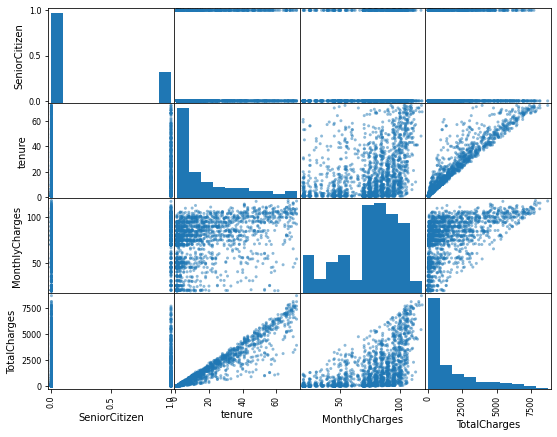

In [155]:
from pandas.plotting import scatter_matrix
scatter_matrix(churn_data,figsize=(9,7))
plt.show()

In [156]:
telcom['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7032, dtype: int64

In [0]:
num_col=telcom.select_dtypes(include=['int64','float64']).columns.tolist()
#removing "SeniorCitizen" column name
num_col=num_col[1:]

In [0]:
#removing 'SeniorCitizen' column name which is already in 0,1 form
binary_col=telcom.nunique()[telcom.nunique()==2].keys().tolist()
binary_col.remove('SeniorCitizen')

In [0]:
categorical_col=telcom.nunique()[(telcom.nunique()>2)&(telcom.nunique()<5)].keys().tolist()

In [0]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
#binary transformation 
l=LabelEncoder()
for i in binary_col:
  telcom[i]=l.fit_transform(telcom[i])

In [0]:
std=StandardScaler()
sacled_num=pd.DataFrame(std.fit_transform(telcom[num_col]),columns=num_col)

In [0]:
telcom.drop(columns=num_col,inplace=True)

In [0]:
telcom=telcom.merge(sacled_num,left_index=True,right_index=True)

In [0]:
telcom=pd.get_dummies(data=telcom,columns=categorical_col)

In [0]:
x=telcom.drop(['Churn','customerID'],axis=1)
y=pd.DataFrame(telcom['Churn'])
ID=telcom['customerID']

In [0]:
from sklearn.model_selection import  train_test_split

In [0]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lg=LogisticRegression()

In [170]:
lg.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
prediction=lg.predict(test_x)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [173]:
 print (classification_report(tetst_y,prediction))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1026
           1       0.32      0.26      0.28       379

    accuracy                           0.65      1405
   macro avg       0.53      0.53      0.53      1405
weighted avg       0.63      0.65      0.64      1405



In [174]:
confusion_matrix(test_y,prediction)

array([[917, 120],
       [177, 191]])

In [175]:
f1_score(test_y,prediction)

0.5625920471281295

In [0]:
#down sampling
#no_churn=0
#churn=1
no_churn_id=telcom[telcom['Churn']==0].index
churn_id=telcom[telcom['Churn']==1].index
count_churn=len(churn_id)

In [0]:
no_churn_id=np.random.choice(no_churn_id,count_churn)
balanced_id=np.concatenate([no_churn_id,churn_id])

In [0]:
balanced_data=telcom.loc[balanced_id]

In [205]:
balanced_data['Churn'].value_counts()

1    1866
0    1866
Name: Churn, dtype: int64

In [0]:
balanced_x=balanced_data.drop(['Churn','customerID'],axis=1)

In [0]:
balanced_y=balanced_data['Churn']

In [0]:
b_train_x,b_test_x,b_train_y,b_test_y=train_test_split(balanced_x,balanced_y,test_size=.2)

In [210]:
lg.fit(b_train_x,b_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
b_prediction=lg.predict(b_test_x)

In [214]:
print(classification_report(b_test_y,b_prediction))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       377
           1       0.70      0.75      0.73       370

    accuracy                           0.72       747
   macro avg       0.72      0.72      0.72       747
weighted avg       0.72      0.72      0.72       747



In [217]:
f1_score(b_test_y,b_prediction)

0.727509778357236

In [0]:
from sklearn.ensemble import  RandomForestClassifier

In [0]:
rf=RandomForestClassifier()

In [220]:
rf.fit(b_train_x,b_train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_prediction=rf.predict(b_test_x)

In [226]:
print(classification_report(b_test_y,rf_prediction))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       377
           1       0.90      0.84      0.87       370

    accuracy                           0.87       747
   macro avg       0.87      0.87      0.87       747
weighted avg       0.87      0.87      0.87       747



In [227]:
f1_score(b_test_y,rf_prediction)

0.8671328671328672

In [0]:
#we can see that using random forest gave higher f1 score